In [27]:
import pandas as pd
import seaborn as sns

##### import data

In [9]:
rent11 = pd.read_csv('apartments_rent_pl_2023_11.csv')
rent11 = rent11.assign(date='November 2023')

rent12 = pd.read_csv('apartments_rent_pl_2023_12.csv')
rent12 = rent12.assign(date='December 2023')


In [10]:
df = pd.concat([rent11, rent12])
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,date
0,2a1a6db97ff122d6bc148abb6f0e498a,szczecin,blockOfFlats,52.0,2.0,3.0,3.0,2008.0,53.460535,14.545416,...,condominium,brick,NaN,yes,yes,no,no,no,3500,November 2023
1,5a0cb42c088eadf75aa98a4118640048,szczecin,blockOfFlats,57.0,3.0,NaN,10.0,1976.0,53.440955,14.566024,...,condominium,NaN,premium,no,yes,yes,no,no,3000,November 2023
2,996722490efcb4b34d48bb84a9a72838,szczecin,NaN,43.4,2.0,3.0,4.0,NaN,53.435746,14.560764,...,condominium,NaN,NaN,no,yes,no,no,no,1900,November 2023
3,50d75c688530b9a61ba505301e0b94a9,szczecin,apartmentBuilding,32.6,2.0,5.0,6.0,2021.0,53.421582,14.541572,...,condominium,brick,premium,no,yes,yes,no,no,2500,November 2023
4,9b187f4203adabf466fd08610d8f4e5e,szczecin,apartmentBuilding,72.0,3.0,6.0,6.0,2014.0,53.450010,14.547230,...,condominium,brick,premium,no,yes,yes,no,yes,2999,November 2023


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17405 entries, 0 to 8871
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17405 non-null  object 
 1   city                  17405 non-null  object 
 2   type                  12844 non-null  object 
 3   squareMeters          17405 non-null  float64
 4   rooms                 17405 non-null  float64
 5   floor                 15339 non-null  float64
 6   floorCount            17024 non-null  float64
 7   buildYear             12078 non-null  float64
 8   latitude              17405 non-null  float64
 9   longitude             17405 non-null  float64
 10  centreDistance        17405 non-null  float64
 11  poiCount              17405 non-null  float64
 12  schoolDistance        17398 non-null  float64
 13  clinicDistance        17387 non-null  float64
 14  postOfficeDistance    17396 non-null  float64
 15  kindergartenDistance

##### null values

In [21]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.Collecting missingno



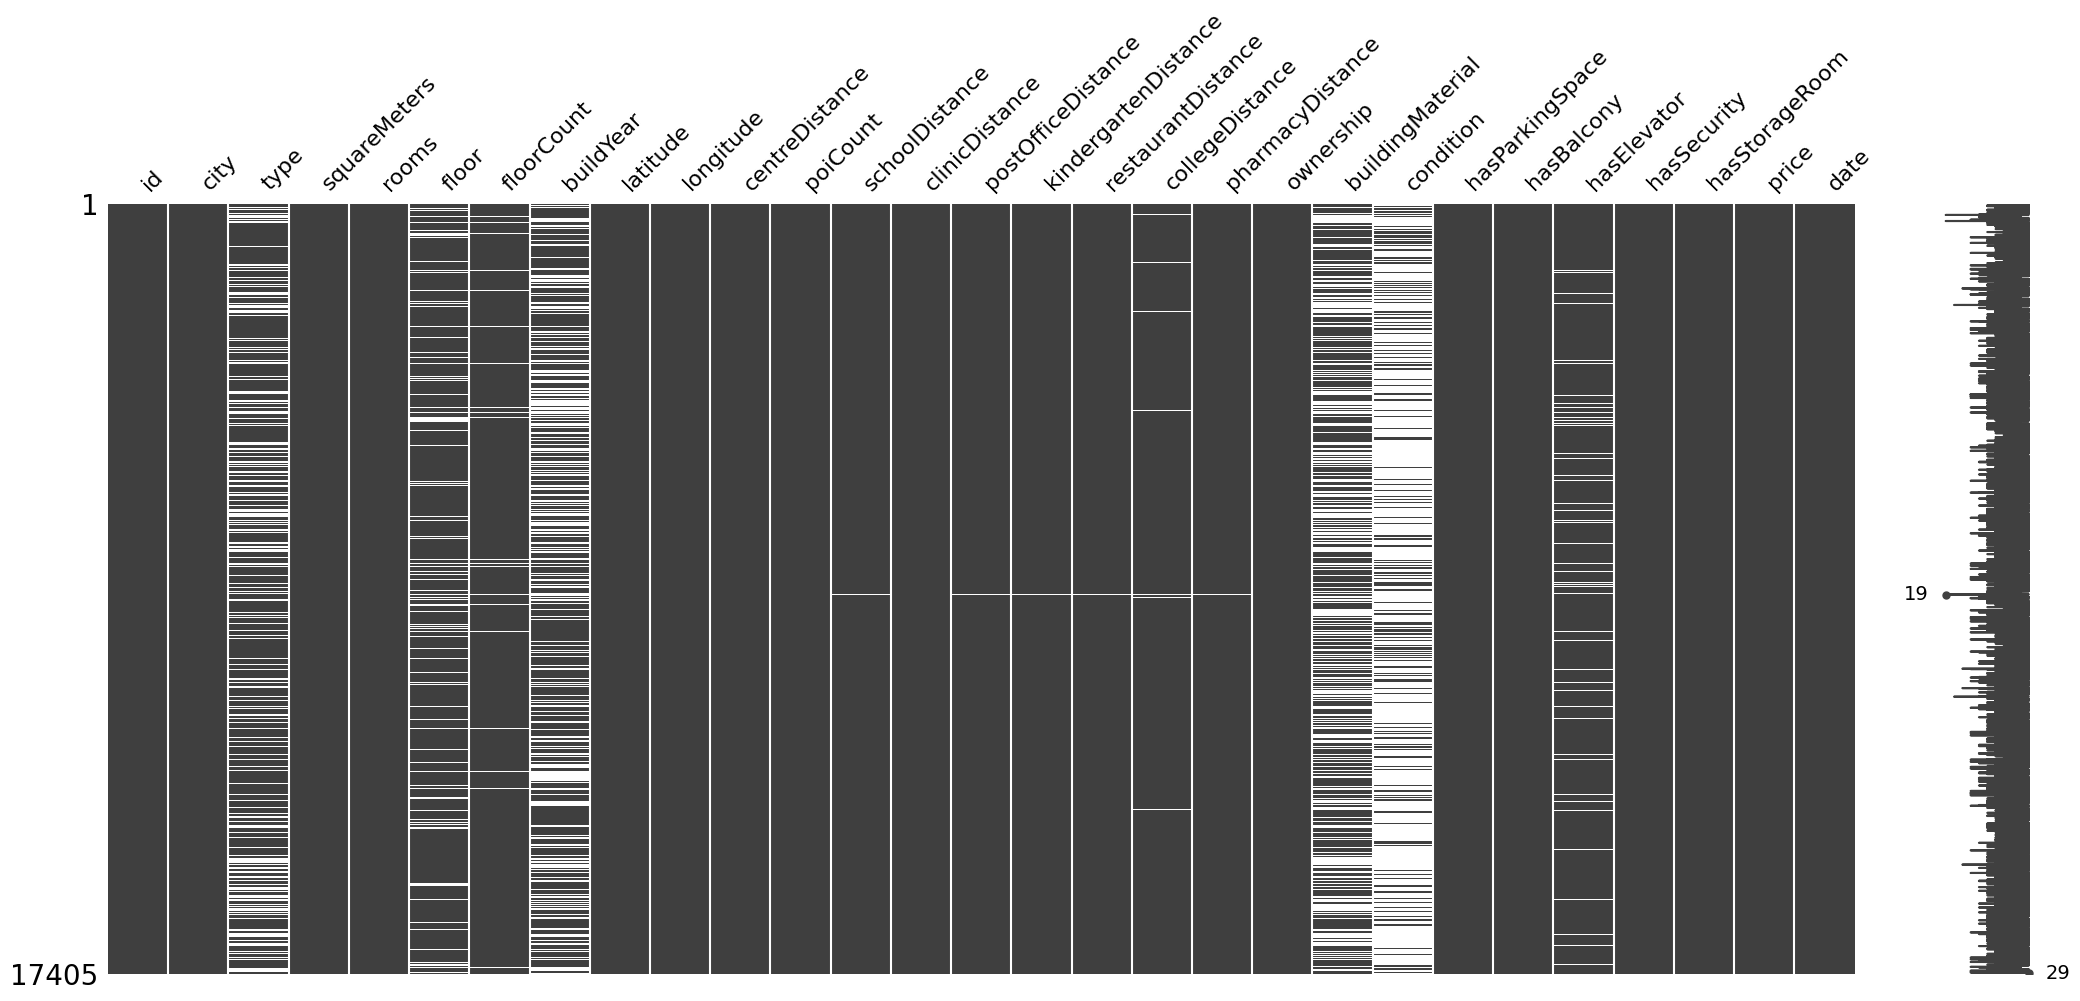

In [22]:
import missingno as msno
import matplotlib.pyplot as plt

# Generowanie macierzy wartości null
msno.matrix(df)

# Wyświetlanie macierzy
plt.show()

In [25]:
rare_columns = ['type', 'buildYear', 'buildingMaterial','condition']


##### EDA

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
squareMeters,17405.0,56.508959,22.991839,25.000000,40.000000,50.000000,65.940000,150.000000
rooms,17405.0,2.431083,0.876825,1.000000,2.000000,2.000000,3.000000,6.000000
floor,15339.0,3.506422,2.734314,1.000000,2.000000,3.000000,4.000000,25.000000
floorCount,17024.0,5.775905,3.592175,1.000000,4.000000,5.000000,7.000000,29.000000
buildYear,12078.0,1997.785809,29.942363,1850.000000,1981.000000,2009.000000,2019.000000,2023.000000
latitude,17405.0,51.903524,1.184122,49.982150,51.111676,52.194157,52.257060,54.581756
longitude,17405.0,19.684616,1.701088,14.447127,18.627150,19.960500,21.007074,23.184586
centreDistance,17405.0,3.869721,2.644133,0.020000,1.750000,3.380000,5.510000,16.360000
poiCount,17405.0,25.280839,26.524507,0.000000,9.000000,17.000000,31.000000,199.000000
schoolDistance,17398.0,0.368368,0.358878,0.002000,0.173000,0.283000,0.444000,4.818000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17405 entries, 0 to 8871
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    17405 non-null  object 
 1   city                  17405 non-null  object 
 2   type                  12844 non-null  object 
 3   squareMeters          17405 non-null  float64
 4   rooms                 17405 non-null  float64
 5   floor                 15339 non-null  float64
 6   floorCount            17024 non-null  float64
 7   buildYear             12078 non-null  float64
 8   latitude              17405 non-null  float64
 9   longitude             17405 non-null  float64
 10  centreDistance        17405 non-null  float64
 11  poiCount              17405 non-null  float64
 12  schoolDistance        17398 non-null  float64
 13  clinicDistance        17387 non-null  float64
 14  postOfficeDistance    17396 non-null  float64
 15  kindergartenDistance

<Axes: xlabel='longitude', ylabel='latitude'>

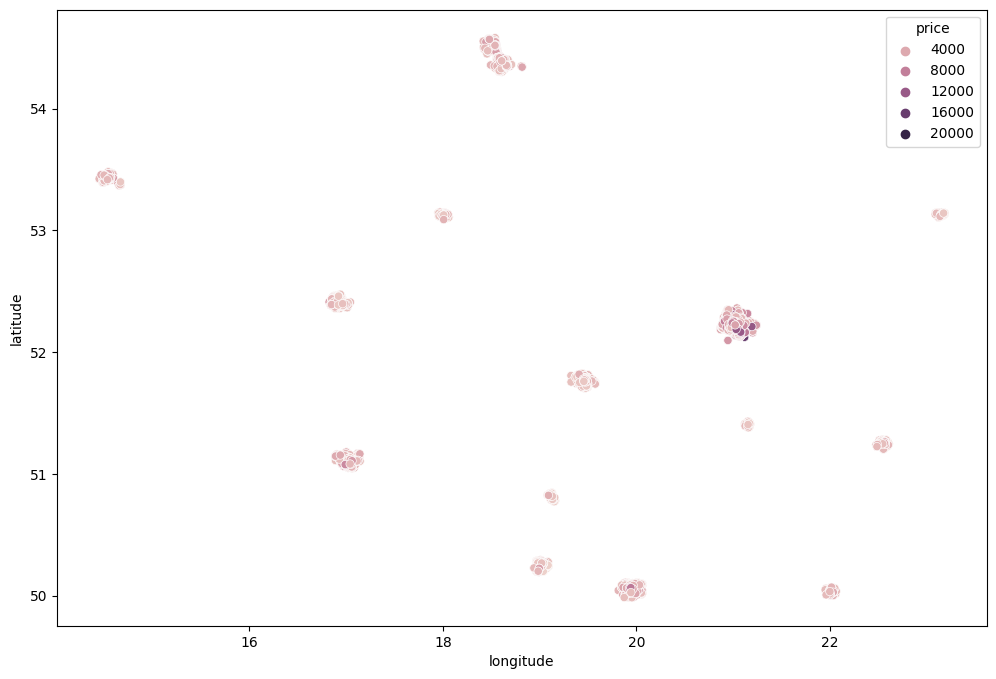

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='price')

WARSAW

In [34]:
df_War = df[df['city'] == 'warszawa'].copy()  # Używamy .copy() aby uniknąć problemów z referencją
df_War.shape


(7244, 29)

<Axes: xlabel='longitude', ylabel='latitude'>

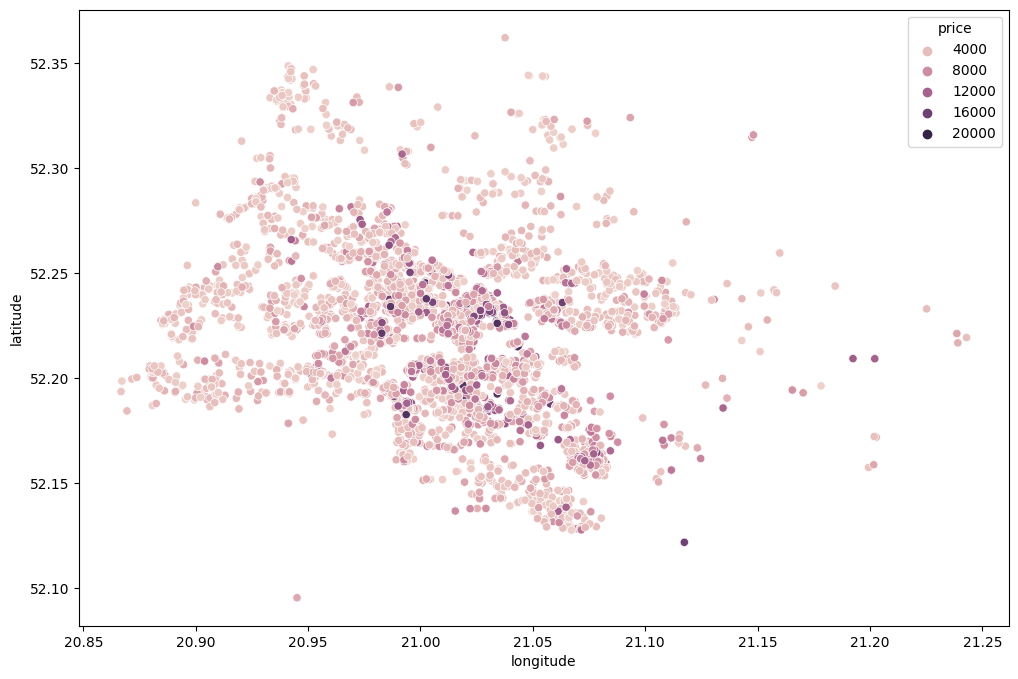

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df_War,hue='price')

<Axes: xlabel='longitude', ylabel='latitude'>

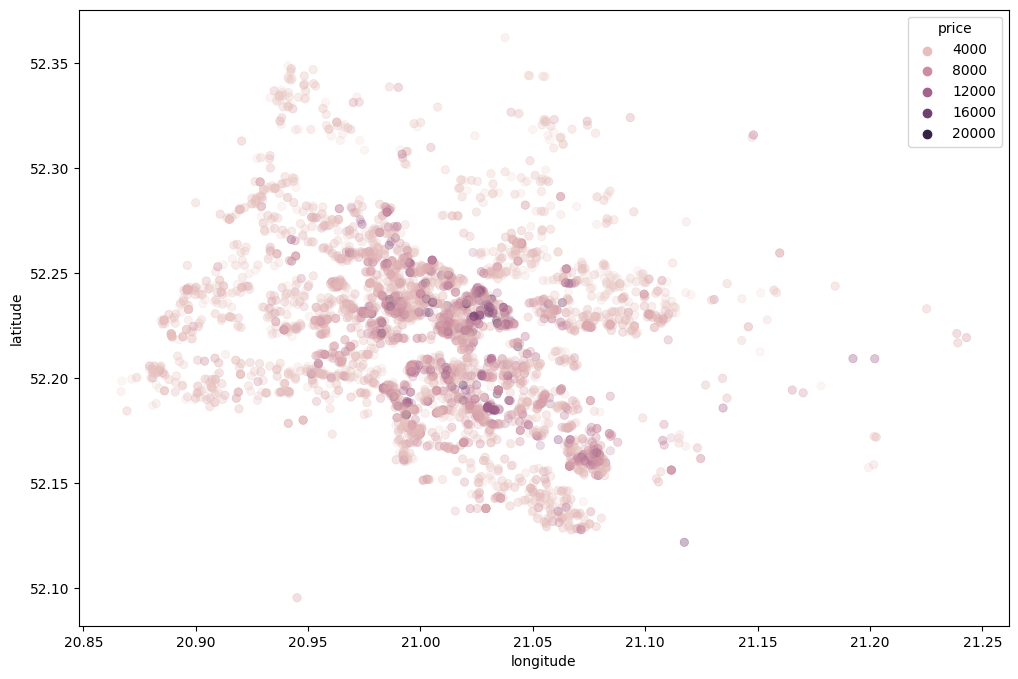

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df_War,
                edgecolor=None, alpha=0.2,hue='price')

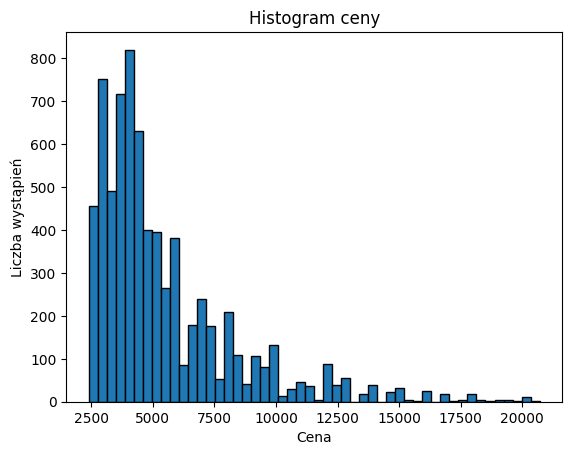

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Załóżmy, że df to Twoja ramka danych

# Wyświetlenie histogramu dla kolumny "cena"
df_War['price'].plot(kind='hist', bins=50, edgecolor='black')

# Dodanie etykiet i tytułu
plt.xlabel('Cena')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram ceny')

# Wyświetlenie histogramu
plt.show()


##### Filters

In [50]:
#chossing only interesting columns

chosen_columns = ['city', 'type', 'squareMeters','rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom', 'price', 'date']

df_newCol = df[chosen_columns].copy()


In [52]:
#filtering
city_filter = df_newCol['city'] == 'warszawa'
price_filter = df_newCol['price'] < 5000
rooms_filter = df_newCol['rooms'] > 1
meterage_filter = df_newCol['squareMeters']>20

# Tworzenie nowej ramki danych df_Warsaw z wybranymi wierszami
df_filtered = df_newCol[city_filter & price_filter & rooms_filter & meterage_filter].copy()

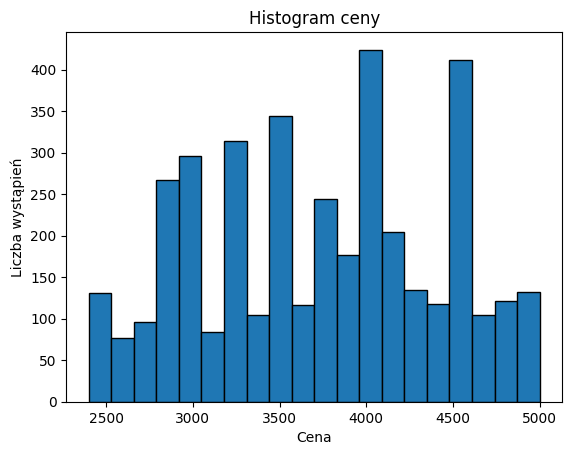

In [56]:
df_filtered['price'].plot(kind='hist', bins=20, edgecolor='black')

# Dodanie etykiet i tytułu
plt.xlabel('Cena')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram ceny')

# Wyświetlenie histogramu
plt.show()


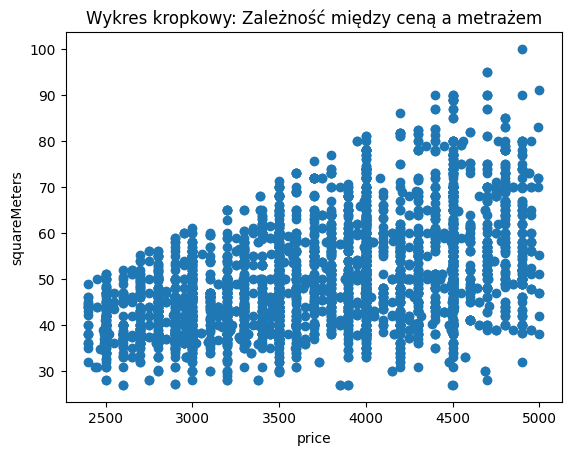

In [63]:
plt.scatter(df_filtered['price'], df_filtered['squareMeters'])

# Dodanie etykiet i tytułu
plt.xlabel('price')
plt.ylabel('squareMeters')
plt.title('Wykres kropkowy: Zależność między ceną a metrażem')

# Wyświetlenie wykresu
plt.show()


In [66]:
df_filtered['condition'].unique()

array([nan, 'premium', 'low'], dtype=object)

<Axes: xlabel='longitude', ylabel='latitude'>

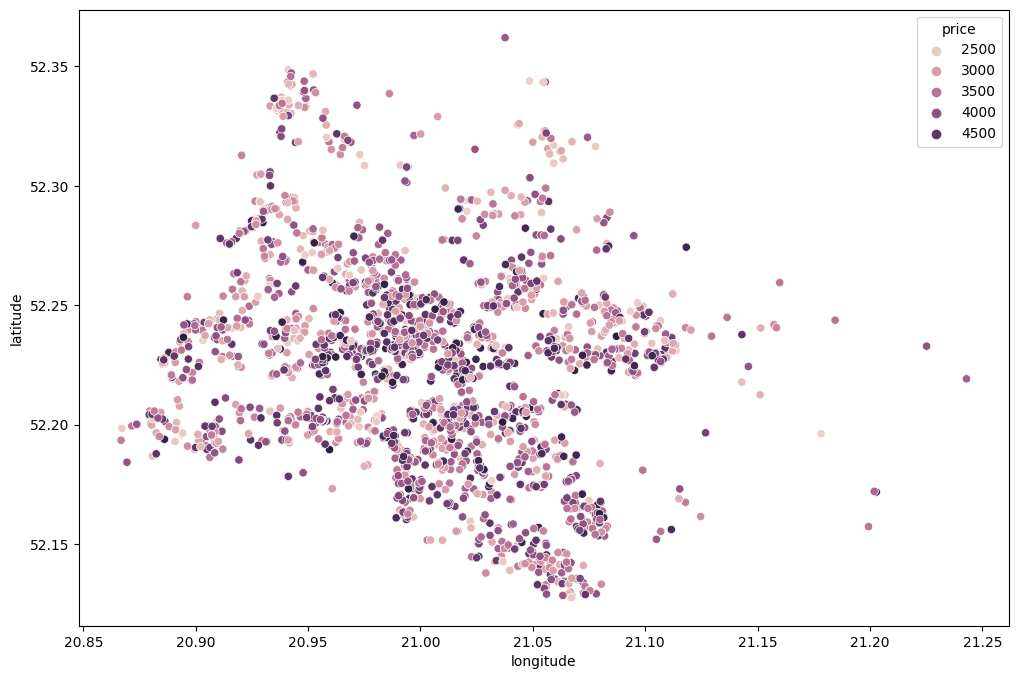

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df_filtered,hue='price')